# imports

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
dataFolder = 'data/aclImdb/'

In [175]:
train_pos_datafolder = dataFolder + 'train/pos/'
train_neg_datafolder = dataFolder + 'train/neg/'

In [176]:
import os
len(list(os.listdir(train_pos_datafolder))), len(list(os.listdir(train_neg_datafolder)))

(12500, 12500)

In [177]:
import re

In [178]:
def clean_text(text):
    text = re.sub(r"\s+", " ", text)
    text = text.replace("<br />", " ").replace("\n", " ").replace("\'", "'").lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r"[^a-zA-Z']", " ", text)
    text = re.sub(r"\b\w\b", " ", text)
    text = re.sub(r"\.[.]+", " ", text)
    text = re.sub(r",[,]+", ",", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip().lower()
    return text

def get_cleaned_df(path,sentiment = None ,clean = False):
    df = {}
    for file in os.listdir(path):
        with open(path + file, 'r') as f:
            rating = int(file.split(".")[0].split("_")[1])
            movie_id = int(file.split(".")[0].split("_")[0])
            desc = f.read()
            if clean:
                desc = clean_text(desc)
            df[movie_id] = [rating, desc]
    df = pd.DataFrame(df).T
    df.columns = ['rating', 'review']
    if sentiment is not None:
        df['sentiment'] = sentiment
    else :
        df['sentiment'] = np.where(df['rating'] > 5, 1, 0)
    return df

In [54]:
train_pos_df = get_cleaned_df(train_pos_datafolder, sentiment = 1, clean = True)
train_pos_df.shape

(12500, 3)

In [56]:
train_pos_df.sort_index().head()

,rating,review,sentiment
0,9,bromwell high is cartoon comedy it ran at the ...,1
1,7,if you like adult comedy cartoons like south p...,1
2,9,bromwell high is nothing short of brilliant ex...,1
3,10,all the world is stage and its people actors i...,1
4,8,futz is the only show preserved from the exper...,1


In [60]:
train_neg_df = get_cleaned_df(train_neg_datafolder , sentiment = 0, clean = True)
train_neg_df.shape

(12500, 3)

In [61]:
train_neg_df.sort_index().head()

,rating,review,sentiment
0,3,story of man who has unnatural feelings for pi...,0
1,1,robert deniro plays the most unbelievably inte...,0
2,1,saw the capsule comment said great acting in m...,0
3,4,if had not read pat barker is 'union street' b...,0
4,4,this fanciful horror flick has vincent price p...,0


In [62]:
train_pos_df.shape , train_neg_df.shape

((12500, 3), (12500, 3))

In [179]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myalla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
train_pos_df['review'] = train_pos_df['review'].apply(remove_stop_words)

In [65]:
train_neg_df['review'] = train_neg_df['review'].apply(remove_stop_words)

In [66]:
train_df = pd.concat([train_pos_df, train_neg_df], axis = 0)
train_df.shape

(25000, 3)

In [67]:
train_df.to_csv(dataFolder + 'train_df.csv', index=False)

In [69]:
train_df.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


# Continue Load trian_df

In [104]:
import numpy as np
import pandas as pd

dataFolder = 'data/aclImdb/'
train_df = pd.read_csv(dataFolder + 'train_df.csv')
train_df.shape

(25000, 3)

### Bag of words

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
cv = count_vec.fit_transform(train_df['review'])
cv.shape

(25000, 73567)

In [106]:
cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Stematization

In [107]:
from nltk.stem.wordnet import WordNetLemmatizer

stemmer = nltk.stem.snowball.SnowballStemmer(language='english')
stemmer.stem('comedy')

'comedi'

In [116]:
print(train_df.iloc[0]['review'])
r = train_df.review.values[0]
r.split(' ')

bromwell high cartoon comedy ran time programs school life teachers years teaching profession lead believe bromwell high satire much closer reality teachers scramble survive financially insightful students see right pathetic teachers' pomp pettiness whole situation remind schools knew students saw episode student repeatedly tried burn school immediately recalled high classic line inspector sack one teachers student welcome bromwell high expect many adults age think bromwell high far fetched pity isn'


['bromwell',
 'high',
 'cartoon',
 'comedy',
 'ran',
 'time',
 'programs',
 'school',
 'life',
 'teachers',
 'years',
 'teaching',
 'profession',
 'lead',
 'believe',
 'bromwell',
 'high',
 'satire',
 'much',
 'closer',
 'reality',
 'teachers',
 'scramble',
 'survive',
 'financially',
 'insightful',
 'students',
 'see',
 'right',
 'pathetic',
 "teachers'",
 'pomp',
 'pettiness',
 'whole',
 'situation',
 'remind',
 'schools',
 'knew',
 'students',
 'saw',
 'episode',
 'student',
 'repeatedly',
 'tried',
 'burn',
 'school',
 'immediately',
 'recalled',
 'high',
 'classic',
 'line',
 'inspector',
 'sack',
 'one',
 'teachers',
 'student',
 'welcome',
 'bromwell',
 'high',
 'expect',
 'many',
 'adults',
 'age',
 'think',
 'bromwell',
 'high',
 'far',
 'fetched',
 'pity',
 "isn'"]

In [131]:
positive_words = []
pos_non_stemmed = []
negative_words = []
neg_non_stemmed = []
stemmed_column = []
for en, review in enumerate(train_df['review']):
    stemmed_sentance = []
    for word in review.split(' '):
        stem_word = stemmer.stem(word)
        stemmed_sentance.append(stem_word)
        if en < 12500:
            positive_words.append(stem_word)
            pos_non_stemmed.append(word)
        else:
            negative_words.append(stem_word)
            neg_non_stemmed.append(word)
    stemmed_column.append(' '.join(stemmed_sentance))

train_df['stemmed_review'] = stemmed_column
train_df.head()

,rating,review,sentiment,stemmed_review
0,9,bromwell high cartoon comedy ran time programs...,1,bromwel high cartoon comedi ran time program s...
1,8,homelessness houselessness george carlin state...,1,homeless houseless georg carlin state issu yea...
2,10,brilliant acting lesley ann warren best dramat...,1,brilliant act lesley ann warren best dramat ho...
3,7,easily underrated film inn brooks cannon sure ...,1,easili underr film inn brook cannon sure flaw ...
4,8,typical mel brooks film much less slapstick mo...,1,typic mel brook film much less slapstick movi ...


In [132]:
positive_words[:10], pos_non_stemmed[:10] , negative_words[:10], neg_non_stemmed[:10]

(['bromwel',
  'high',
  'cartoon',
  'comedi',
  'ran',
  'time',
  'program',
  'school',
  'life',
  'teacher'],
 ['bromwell',
  'high',
  'cartoon',
  'comedy',
  'ran',
  'time',
  'programs',
  'school',
  'life',
  'teachers'],
 ['stori',
  'man',
  'unnatur',
  'feel',
  'pig',
  'start',
  'open',
  'scene',
  'terrif',
  'exampl'],
 ['story',
  'man',
  'unnatural',
  'feelings',
  'pig',
  'starts',
  'opening',
  'scene',
  'terrific',
  'example'])

In [133]:
pos_freq = nltk.FreqDist(positive_words)
pos_freq.most_common(10)

[('film', 25313),
 ('movi', 22665),
 ('one', 14171),
 ('like', 10462),
 ('time', 8499),
 ('good', 7844),
 ('see', 7489),
 ('stori', 7478),
 ('charact', 7075),
 ('make', 6967)]

In [134]:
neg_freq = nltk.FreqDist(negative_words)
neg_freq.most_common(10)

[('movi', 29050),
 ('film', 22896),
 ('one', 13576),
 ('like', 12343),
 ('make', 8241),
 ('bad', 8002),
 ('even', 7801),
 ('time', 7698),
 ('get', 7667),
 ('good', 7523)]

In [135]:
non_stemmed_pos_freq = nltk.FreqDist(pos_non_stemmed)
non_stemmed_pos_freq.most_common(10)

[('film', 20932),
 ('movie', 19060),
 ('one', 13643),
 ('like', 9038),
 ('good', 7704),
 ('story', 6754),
 ('time', 6497),
 ('well', 6409),
 ('great', 6409),
 ('see', 6021)]

In [136]:
non_stemmed_neg_freq = nltk.FreqDist(neg_non_stemmed)
non_stemmed_neg_freq.most_common(10)

[('movie', 24936),
 ('film', 19206),
 ('one', 13128),
 ('like', 11238),
 ('even', 7691),
 ('good', 7397),
 ('bad', 7374),
 ('would', 6902),
 ('really', 6262),
 ('time', 6199)]

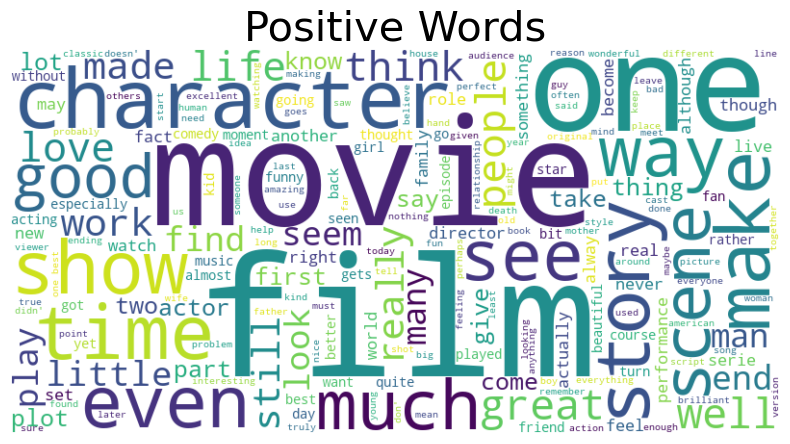

In [137]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(pos_non_stemmed))
_ = plt.figure(figsize=(10, 5))
_ = plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis('off')
_ = plt.title('Positive Words', fontsize=30)
_ = plt.show()

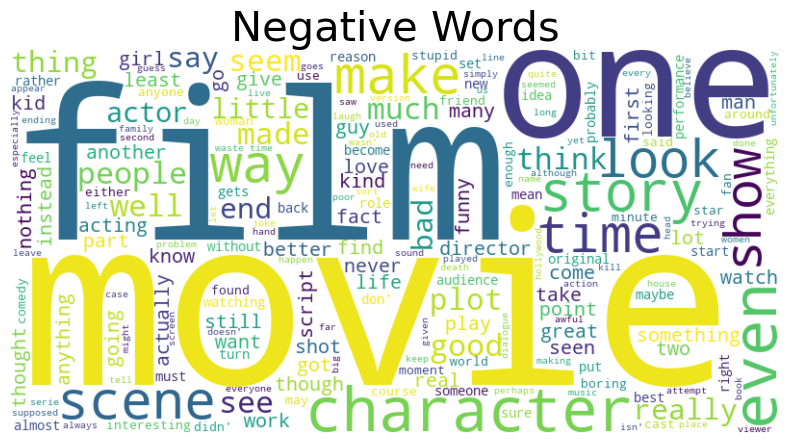

In [138]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neg_non_stemmed))
_ = plt.figure(figsize=(10, 5))
_ = plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis('off')
_ = plt.title('Negative Words', fontsize=30)
_ = plt.show()

In [139]:
only_pos = set(pos_non_stemmed) - set(neg_non_stemmed)
only_neg = set(neg_non_stemmed) - set(pos_non_stemmed)
len(only_pos), len(only_neg)

(22703, 20995)

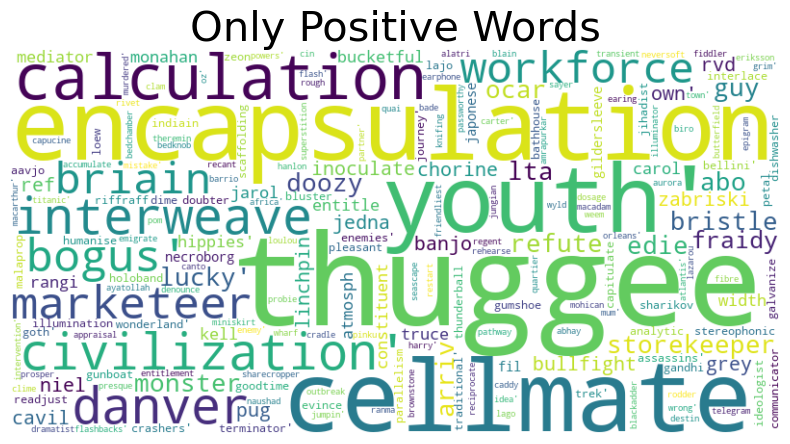

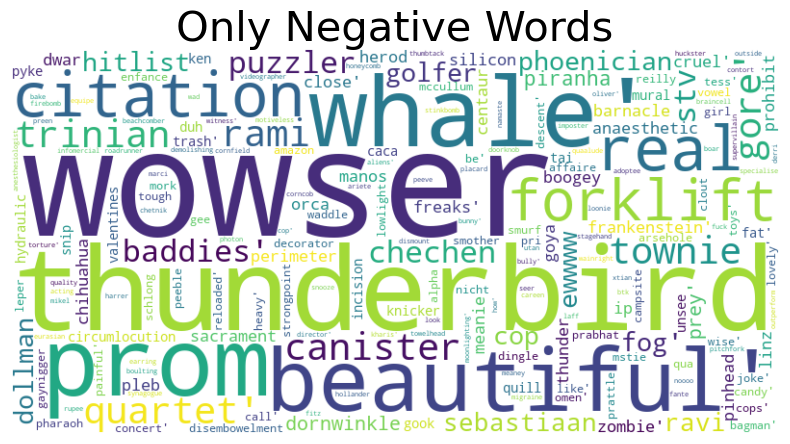

In [140]:
from wordcloud import WordCloud

pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(only_pos))
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(only_neg))

_ = plt.figure(figsize=(10, 5))
_ = plt.imshow(pos_wordcloud, interpolation='bilinear')
_ = plt.axis('off')
_ = plt.title('Only Positive Words', fontsize=30)
_ = plt.show()

_ = plt.figure(figsize=(10, 5))
_ = plt.imshow(neg_wordcloud, interpolation='bilinear')
_ = plt.axis('off')
_ = plt.title('Only Negative Words', fontsize=30)
_ = plt.show()

bigram...

In [141]:
count_vec_bi = CountVectorizer(ngram_range=(1, 2))
cv_bi = count_vec_bi.fit_transform(train_df['review'])
cv_bi.shape

(25000, 1849580)

In [142]:
print(f'{cv_bi.shape[1]:,}')

1,849,580


### Avg TFIDF - W2v

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(train_df['review'])
tfidf.shape

(25000, 73567)

In [144]:
column_names = tfidf_vec.get_feature_names_out()
column_names[:10]

array(['aa', 'aaa', 'aaaaaaah', 'aaaaah', 'aaaaatch', 'aaaahhhhhhh',
       'aaaand', 'aaaarrgh', 'aaah', 'aaargh'], dtype=object)

In [145]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=[review.split(' ') for review in train_df['review']], vector_size=100, window=5, min_count=1, workers=8)
model.wv.most_similar('movie')

[('film', 0.8101480007171631),
 ('flick', 0.6813345551490784),
 ('sequel', 0.6745274662971497),
 ('thats', 0.6457432508468628),
 ('movies', 0.6402322053909302),
 ("'movieworld'", 0.6325560212135315),
 ('anyway', 0.6195894479751587),
 ('dumbfounded', 0.6174150705337524),
 ('guess', 0.6063583493232727),
 ('suppose', 0.606008768081665)]

In [164]:
avg_tfidf_w2v = []
for review in train_df['review']:
    words = review.split(' ')
    avg_tfidf = np.zeros(100)
    total_weight = 0
    for word in words:
        try:
            tfidf_value = tfidf_vec.vocabulary_[word]
            avg_tfidf += model.wv[word] * tfidf_value
            total_weight += tfidf_value
        except:
            pass
    avg_tfidf_w2v.append(avg_tfidf / total_weight)

avg_tfidf_w2v = np.array(avg_tfidf_w2v)

In [165]:
avg_tfidf_w2v.shape

(25000, 100)

In [167]:
X = avg_tfidf_w2v
y = train_df['sentiment'].values
X.shape, y.shape

((25000, 100), (25000,))

### Save

pipeline

In [198]:
train_or_test = 'train'
# train_or_test = 'test'

In [199]:
pos_datafolder = dataFolder + train_or_test + '/pos/'
neg_datafolder = dataFolder + train_or_test + '/neg/'

pos_df = get_cleaned_df(pos_datafolder, sentiment = 1, clean = True)
neg_df = get_cleaned_df(neg_datafolder , sentiment = 0, clean = True)

pos_df['review'] = pos_df['review'].apply(remove_stop_words)
neg_df['review'] = neg_df['review'].apply(remove_stop_words)

df = pd.concat([pos_df, neg_df], axis = 0)
df.shape

(25000, 3)

In [200]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 2))
tfidf = tfidf_vec.fit_transform(train_df['review'])
column_names = tfidf_vec.get_feature_names_out()


In [201]:
model = Word2Vec(sentences=[review.split(' ') for review in train_df['review']], vector_size=100, window=5, min_count=1, workers=8)
model.wv.most_similar('movie')

[('film', 0.807153582572937),
 ('flick', 0.683598518371582),
 ('thats', 0.6758294105529785),
 ('sequel', 0.6730403900146484),
 ('cq', 0.6369032859802246),
 ('movies', 0.6356301307678223),
 ('anyway', 0.633036196231842),
 ('aniversy', 0.6325693130493164),
 ('guess', 0.6226097345352173),
 ('opinion', 0.6131815314292908)]

In [202]:
avg_tfidf_w2v = []
for review in train_df['review']:
    words = review.split(' ')
    avg_tfidf = np.zeros(100)
    total_weight = 0
    for word in words:
        try:
            tfidf_value = tfidf_vec.vocabulary_[word]
            avg_tfidf += model.wv[word] * tfidf_value
            total_weight += tfidf_value
        except:
            pass
    avg_tfidf_w2v.append(avg_tfidf / total_weight)

avg_tfidf_w2v = np.array(avg_tfidf_w2v)

In [203]:
X = avg_tfidf_w2v
y = train_df['sentiment'].values
X.shape, y.shape

((25000, 100), (25000,))

In [204]:
np.save(dataFolder + 'X_'+ train_or_test +'.npy', X)
np.save(dataFolder + 'y_'+ train_or_test +'.npy', y)
np.save(dataFolder + 'cols_'+ train_or_test +'.npy', column_names)

In [205]:
df.to_csv(dataFolder + train_or_test + '_df.csv', index=False)

TEST

In [206]:
train_or_test = 'test'

In [207]:
pos_datafolder = dataFolder + train_or_test + '/pos/'
neg_datafolder = dataFolder + train_or_test + '/neg/'

pos_df = get_cleaned_df(pos_datafolder, sentiment = 1, clean = True)
neg_df = get_cleaned_df(neg_datafolder , sentiment = 0, clean = True)

pos_df['review'] = pos_df['review'].apply(remove_stop_words)
neg_df['review'] = neg_df['review'].apply(remove_stop_words)

df = pd.concat([pos_df, neg_df], axis = 0)
df.shape
tfidf_vec = TfidfVectorizer(ngram_range=(1, 2))
tfidf = tfidf_vec.fit_transform(train_df['review'])
column_names = tfidf_vec.get_feature_names_out()

model = Word2Vec(sentences=[review.split(' ') for review in train_df['review']], vector_size=100, window=5, min_count=1, workers=8)
model.wv.most_similar('movie')
avg_tfidf_w2v = []
for review in train_df['review']:
    words = review.split(' ')
    avg_tfidf = np.zeros(100)
    total_weight = 0
    for word in words:
        try:
            tfidf_value = tfidf_vec.vocabulary_[word]
            avg_tfidf += model.wv[word] * tfidf_value
            total_weight += tfidf_value
        except:
            pass
    avg_tfidf_w2v.append(avg_tfidf / total_weight)

avg_tfidf_w2v = np.array(avg_tfidf_w2v)
X = avg_tfidf_w2v
y = train_df['sentiment'].values
X.shape, y.shape

np.save(dataFolder + 'X_'+ train_or_test +'.npy', X)
np.save(dataFolder + 'y_'+ train_or_test +'.npy', y)
np.save(dataFolder + 'cols_'+ train_or_test +'.npy', column_names)
df.to_csv(dataFolder + train_or_test + '_df.csv', index=False)


(25000, 3)

[('film', 0.7965153455734253),
 ('flick', 0.6895015239715576),
 ('thats', 0.6839518547058105),
 ('sequel', 0.6709718704223633),
 ('anyway', 0.6542293429374695),
 ('guess', 0.648067831993103),
 ('movies', 0.6416245698928833),
 ('joke', 0.6381902098655701),
 ('expecting', 0.6354743838310242),
 ('amazed', 0.6137110590934753)]

((25000, 100), (25000,))